<a href="https://colab.research.google.com/github/PranjalChaudhary/Seoul-Bike_Sharing_Demand_Prediction/blob/main/Pranjal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
file_path ='/content/drive/MyDrive/Bike_Sharing_Demand_Prediction/Dataset_and_Problem_Statement/SeoulBikeData.csv'
df=pd.read_csv(file_path,encoding='latin1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df[df.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


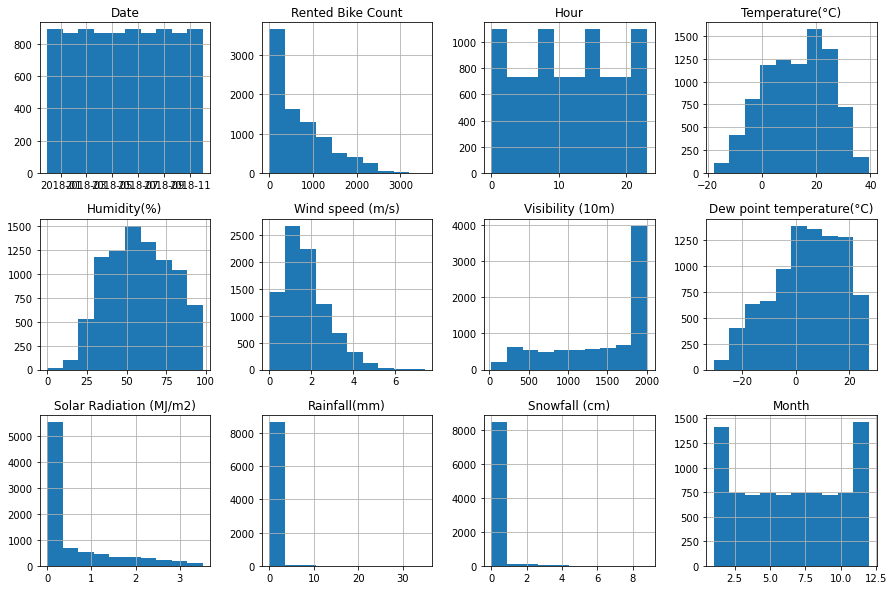

In [ ]:
plt.rcParams["figure.figsize"] = [17, 17]      
df.hist(layout=(3,4), figsize=(15,10))
plt.show()

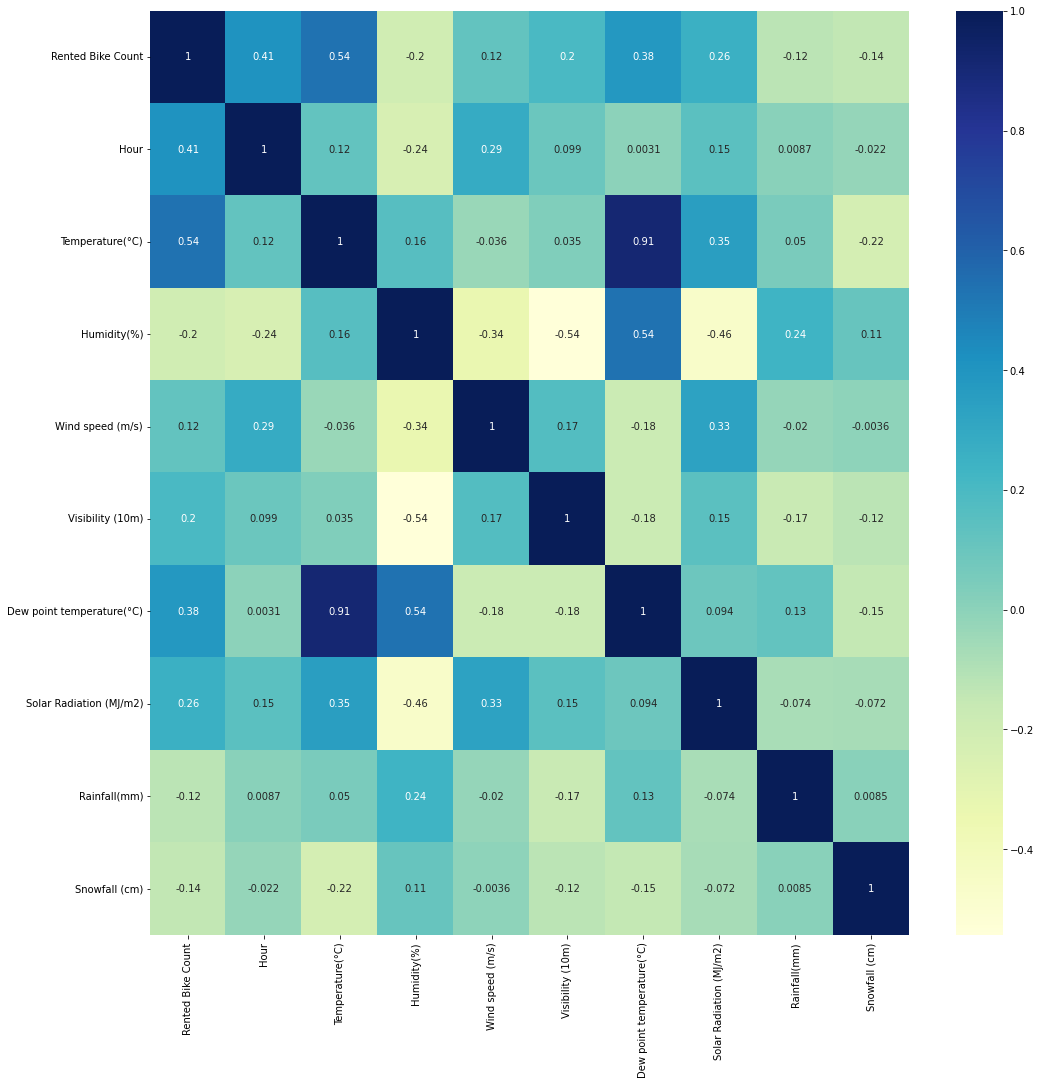

In [ ]:
heatmap=sns.heatmap(df.drop(["Date","Month","Holiday","Functioning Day"],axis=1).corr(),cmap="YlGnBu",annot=True)

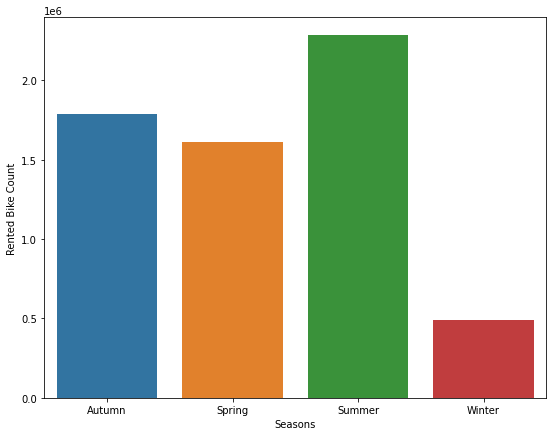

In [ ]:
season_bikerent =  pd.DataFrame(df.groupby('Seasons',as_index = False)['Rented Bike Count'].sum()) 


plt.rcParams["figure.figsize"] = [9, 7] 
sns.barplot(x="Seasons",y="Rented Bike Count",data=season_bikerent)
plt.show()

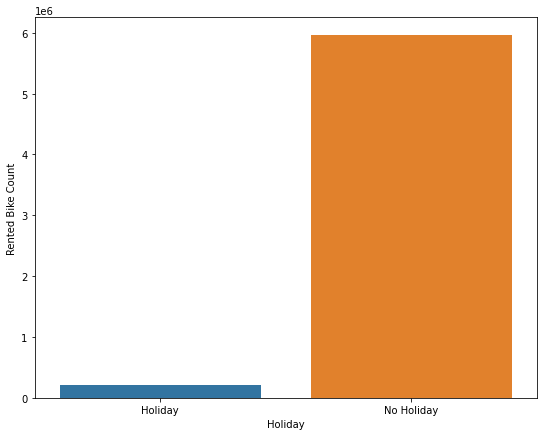

In [ ]:
holiday_bikerent =  pd.DataFrame(df.groupby('Holiday',as_index = False)['Rented Bike Count'].sum())
sns.barplot(x="Holiday",y="Rented Bike Count",data=holiday_bikerent)
plt.show()

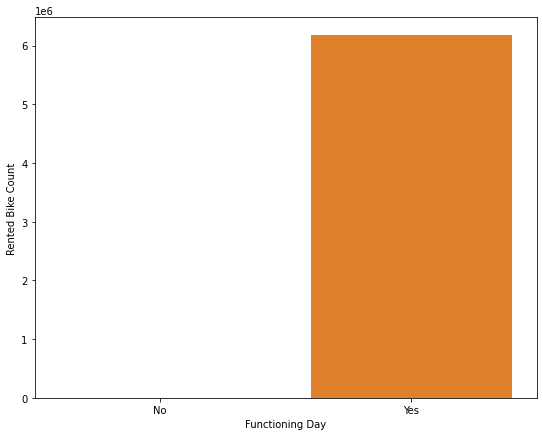

In [ ]:
func_day_bikerent =  pd.DataFrame(df.groupby('Functioning Day',as_index = False)['Rented Bike Count'].sum())
sns.barplot(x="Functioning Day",y="Rented Bike Count",data=func_day_bikerent)
plt.show()

In [ ]:
def day_time_encoder(hour):
  if (20 <= hour <= 23) or (0 <= hour <=3):
    return "night"
  elif (4<= hour <=11):
    return 'morning'
  elif (12<= hour <=16):
    return 'afternoon'
  else:
    return 'evening'

df['daytime'] = df.Hour.apply(day_time_encoder)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,daytime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,evening
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night


In [ ]:
def cyclic_x(hour):
  return np.sin(2*np.pi*hour/24)

def cyclic_y(hour):
  return np.cos(2*np.pi*hour/24)
 
df['xhr'] = df.Hour.apply(cyclic_x)

df['yhr'] = df.Hour.apply(cyclic_y)

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,daytime,xhr,yhr
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,0.000000,1.000000
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,0.258819,0.965926
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,0.500000,0.866025
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,0.707107,0.707107
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,morning,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,evening,-0.965926,0.258819
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night,-0.866025,0.500000
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night,-0.707107,0.707107
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night,-0.500000,0.866025


In [ ]:
df = pd.get_dummies(df,columns = ['Functioning Day','Holiday'])

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Month,daytime,xhr,yhr,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,12,night,0.000000,1.000000,0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,12,night,0.258819,0.965926,0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,12,night,0.500000,0.866025,0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,12,night,0.707107,0.707107,0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,12,morning,0.866025,0.500000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,11,evening,-0.965926,0.258819,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,11,night,-0.866025,0.500000,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,11,night,-0.707107,0.707107,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,11,night,-0.500000,0.866025,0,1,0,1


In [ ]:
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
season = (df.groupby(by=['Seasons']))
winter_data = season.get_group('Winter')
spring_data = season.get_group('Spring')
summer_data = season.get_group('Summer')
autumn_data = season.get_group('Autumn')

In [ ]:
winter_data =winter_data.drop('Seasons',axis=1)
winter_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,daytime,xhr,yhr,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,night,0.000000,1.000000,0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,night,0.258819,0.965926,0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,night,0.500000,0.866025,0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,night,0.707107,0.707107,0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,morning,0.866025,0.500000,0,1,0,1


In [ ]:
spring_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Month,daytime,xhr,yhr,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
2160,2018-03-01,71,0,2.0,96,1.3,1894,1.4,0.0,2.0,0.0,Spring,3,night,0.000000,1.000000,0,1,1,0
2161,2018-03-01,147,1,2.1,97,0.2,859,1.6,0.0,0.0,0.0,Spring,3,night,0.258819,0.965926,0,1,1,0
2162,2018-03-01,180,2,2.0,97,1.0,580,1.5,0.0,0.0,0.0,Spring,3,night,0.500000,0.866025,0,1,1,0
2163,2018-03-01,92,3,1.6,97,2.3,469,1.1,0.0,0.1,0.0,Spring,3,night,0.707107,0.707107,0,1,1,0
2164,2018-03-01,28,4,1.6,97,1.1,636,1.1,0.0,0.0,0.0,Spring,3,morning,0.866025,0.500000,0,1,1,0


In [ ]:
autumn_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Month,daytime,xhr,yhr,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
6576,2018-09-01,1075,0,23.2,83,0.5,1887,20.1,0.0,0.0,0.0,Autumn,9,night,0.000000,1.000000,0,1,0,1
6577,2018-09-01,975,1,22.7,83,0.1,1940,19.6,0.0,0.0,0.0,Autumn,9,night,0.258819,0.965926,0,1,0,1
6578,2018-09-01,785,2,22.0,86,0.4,1703,19.5,0.0,0.0,0.0,Autumn,9,night,0.500000,0.866025,0,1,0,1
6579,2018-09-01,514,3,21.6,87,0.3,1579,19.3,0.0,0.0,0.0,Autumn,9,night,0.707107,0.707107,0,1,0,1
6580,2018-09-01,338,4,21.2,88,0.9,1183,19.1,0.0,0.0,0.0,Autumn,9,morning,0.866025,0.500000,0,1,0,1


In [ ]:
summer_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Month,daytime,xhr,yhr,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
4368,2018-06-01,963,0,20.1,63,1.1,1698,12.8,0.0,0.0,0.0,Summer,6,night,0.000000,1.000000,0,1,0,1
4369,2018-06-01,776,1,19.5,65,0.4,1662,12.7,0.0,0.0,0.0,Summer,6,night,0.258819,0.965926,0,1,0,1
4370,2018-06-01,554,2,19.0,72,1.4,1258,13.8,0.0,0.0,0.0,Summer,6,night,0.500000,0.866025,0,1,0,1
4371,2018-06-01,366,3,18.6,72,1.4,1340,13.4,0.0,0.0,0.0,Summer,6,night,0.707107,0.707107,0,1,0,1
4372,2018-06-01,265,4,18.1,76,1.8,561,13.7,0.0,0.0,0.0,Summer,6,morning,0.866025,0.500000,0,1,0,1
